In [1]:
from PIL import Image
from torchvision import transforms, models
import torch
import torch.nn.functional as F
import torch.nn as nn
import json
import matplotlib.pyplot as plt
import os


class MolePredictor:
    def __init__(self, weights_path, device=None):
        """
        Initializes the predictor.
        """
        self.device = device if device else torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Load model
        self.model = models.resnet18(pretrained=True)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, 3)  # 3 classes
        self.model.load_state_dict(torch.load(weights_path, map_location=self.device))
        self.model = self.model.to(self.device)
        self.model.eval()

        self.idx_to_group = {0: "benign", 1: "suspicious", 2: "melanoma"}
        self.group_map = {
            "melanoma": "melanoma",
            "basal cell carcinoma": "suspicious",
            "actinic keratoses": "suspicious",
            "melanocytic nevi": "benign",
            "benign keratosis-like lesions": "benign",
            "dermatofibroma": "benign",
            "vascular lesions": "benign",
        }

        self.transform = transforms.Compose(
            [
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ]
        )

    def predict(self, image_path, show_image=True):
        """
        Predicts the class of a single mole image and optionally displays it.
        """
        image = Image.open(image_path).convert("RGB")
        input_tensor = self.transform(image).unsqueeze(0).to(self.device)

        with torch.no_grad():
            outputs = self.model(input_tensor)
            probs = F.softmax(outputs, dim=1)
            prob, pred_idx = torch.max(probs, dim=1)

        label = self.idx_to_group[pred_idx.item()]
        probability = prob.item()

        if show_image:
            plt.imshow(image)
            plt.axis("off")
            plt.title(f"{label} ({probability:.2f})")
            plt.show()

        try:
            # Fix the path - annotations are in the ann folder, not with the images
            image_filename = os.path.basename(image_path)
            ann_path = image_path.replace("/img/", "/ann/") + ".json"
            # print(f"Looking for annotation at: {ann_path}")

            with open(ann_path, "r") as f:
                ann = json.load(f)
            true_label = ann["objects"][0]["classTitle"]
            true_group_label = self.group_map[true_label]
            extra_text = f" (True: {true_label}), that is {true_group_label}"
            if true_group_label == label:
                extra_text += " - Correct"
            else:
                extra_text += " - Incorrect"
        except Exception as e:
            print(f"Could not load annotation: {e}")
            extra_text = ""

        return f"Prediction: {label}, Probability: {probability:.2f}. {extra_text}"

c:\Users\major\Documents\University\DeepLearning\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\major\Documents\University\DeepLearning\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


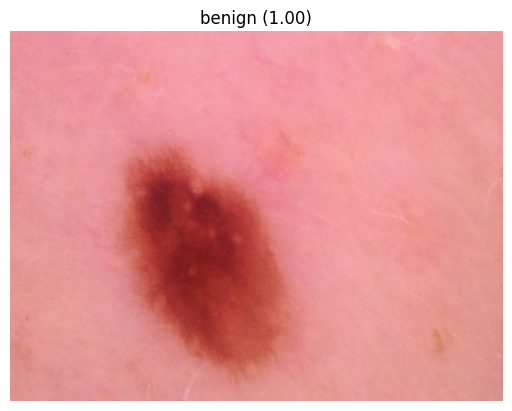

Prediction: benign, Probability: 1.00.  (True: melanocytic nevi), that is benign - Correct


In [2]:
predictor = MolePredictor("melanoma_model_weights.pth")
result = predictor.predict("data/ham10000/ds/img/ISIC_0024353.jpg")
print(result)

# IRJUK ODA? HOGY MIÉRT AZT A MODELLT VÁLASZTOTTUK!!!! miért az a legalkalmasabb

In [ ]:
files = os.listdir("data/ham10000/ds/img")
from tqdm import tqdm

files_results = {}
for file in tqdm(files):
    if file.endswith(".jpg"):
        image_path = os.path.join("data/ham10000/ds/img", file)
        result = predictor.predict(image_path, show_image=False)
        files_results[file] = result

  0%|          | 0/10016 [00:00<?, ?it/s]

  0%|          | 2/10016 [00:00<14:44, 11.32it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024306.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024307.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024308.jpg.json'


  0%|          | 6/10016 [00:00<11:55, 13.98it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024309.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024310.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024311.jpg.json'


  0%|          | 8/10016 [00:00<12:06, 13.77it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024312.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024313.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024314.jpg.json'


  0%|          | 10/10016 [00:00<13:36, 12.26it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024315.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024316.jpg.json'


  0%|          | 14/10016 [00:01<14:59, 11.11it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024317.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024318.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024319.jpg.json'


  0%|          | 16/10016 [00:01<15:02, 11.08it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024320.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024321.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024322.jpg.json'


  0%|          | 20/10016 [00:01<13:34, 12.28it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024323.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024324.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024325.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024326.jpg.json'


  0%|          | 24/10016 [00:01<13:07, 12.69it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024327.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024328.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024329.jpg.json'


  0%|          | 26/10016 [00:02<13:24, 12.42it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024330.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024331.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024332.jpg.json'


  0%|          | 28/10016 [00:02<13:50, 12.02it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024333.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024334.jpg.json'


  0%|          | 32/10016 [00:02<14:06, 11.80it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024335.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024336.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024337.jpg.json'


  0%|          | 34/10016 [00:02<13:58, 11.91it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024338.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024339.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024340.jpg.json'


  0%|          | 38/10016 [00:03<14:17, 11.64it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024341.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024342.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024343.jpg.json'


  0%|          | 40/10016 [00:03<14:35, 11.40it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024344.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024345.jpg.json'


  0%|          | 42/10016 [00:03<14:46, 11.25it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024346.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024347.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024348.jpg.json'


  0%|          | 46/10016 [00:03<15:06, 11.00it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024349.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024350.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024351.jpg.json'


  0%|          | 48/10016 [00:04<13:35, 12.23it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024352.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024353.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024354.jpg.json'


  1%|          | 52/10016 [00:04<14:19, 11.59it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024355.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024356.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024357.jpg.json'


  1%|          | 54/10016 [00:04<13:59, 11.86it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024358.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024359.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024360.jpg.json'


  1%|          | 58/10016 [00:04<14:40, 11.30it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024361.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024362.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024363.jpg.json'


  1%|          | 60/10016 [00:05<14:01, 11.83it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024364.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024365.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024366.jpg.json'


  1%|          | 64/10016 [00:05<13:22, 12.40it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024367.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024368.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024369.jpg.json'


  1%|          | 66/10016 [00:05<13:31, 12.27it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024370.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024371.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024372.jpg.json'


  1%|          | 71/10016 [00:05<12:28, 13.28it/s]

Could not load annotation: Expecting value: line 1 column 1 (char 0)
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024374.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024375.jpg.json'


  1%|          | 73/10016 [00:06<13:18, 12.45it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024376.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024377.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024378.jpg.json'


  1%|          | 77/10016 [00:06<15:19, 10.81it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024379.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024380.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024381.jpg.json'


  1%|          | 81/10016 [00:06<14:04, 11.76it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024382.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024383.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024384.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024385.jpg.json'


  1%|          | 83/10016 [00:07<13:15, 12.48it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024386.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024387.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024388.jpg.json'


  1%|          | 87/10016 [00:07<13:49, 11.97it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024389.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024390.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024391.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024392.jpg.json'


  1%|          | 91/10016 [00:07<12:56, 12.79it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024393.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024394.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024395.jpg.json'


  1%|          | 93/10016 [00:07<13:43, 12.05it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024396.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024397.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024398.jpg.json'


  1%|          | 97/10016 [00:08<14:36, 11.32it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024399.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024400.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024401.jpg.json'


  1%|          | 99/10016 [00:08<14:35, 11.33it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024402.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024403.jpg.json'


  1%|          | 101/10016 [00:08<15:58, 10.34it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024404.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024405.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024406.jpg.json'


  1%|          | 105/10016 [00:08<13:41, 12.07it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024407.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024408.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024409.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024410.jpg.json'


  1%|          | 109/10016 [00:09<12:50, 12.85it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024411.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024412.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024413.jpg.json'


  1%|          | 111/10016 [00:09<13:35, 12.15it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024414.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024415.jpg.json'


  1%|          | 113/10016 [00:09<14:17, 11.55it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024416.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024417.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024418.jpg.json'


  1%|          | 115/10016 [00:09<13:51, 11.90it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024419.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024420.jpg.json'


  1%|          | 119/10016 [00:10<13:38, 12.09it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024421.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024422.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024423.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024424.jpg.json'


  1%|          | 123/10016 [00:10<13:26, 12.27it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024425.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024426.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024427.jpg.json'


  1%|▏         | 127/10016 [00:10<11:46, 14.01it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024428.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024429.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024430.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024431.jpg.json'


  1%|▏         | 131/10016 [00:10<10:23, 15.86it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024432.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024433.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024434.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024435.jpg.json'


  1%|▏         | 133/10016 [00:11<10:37, 15.49it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024436.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024437.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024438.jpg.json'


  1%|▏         | 137/10016 [00:11<12:46, 12.89it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024439.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024440.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024441.jpg.json'


  1%|▏         | 139/10016 [00:11<11:32, 14.27it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024442.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024443.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024444.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024445.jpg.json'


  1%|▏         | 143/10016 [00:11<12:43, 12.94it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024446.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024447.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024448.jpg.json'


  1%|▏         | 147/10016 [00:12<12:54, 12.74it/s]

Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024449.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024450.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024451.jpg.json'
Could not load annotation: [Errno 2] No such file or directory: 'data/ham10000/ds/img\\ISIC_0024452.jpg.json'


  1%|▏         | 149/10016 [00:12<11:35, 14.18it/s]